# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [30]:
### Здесь требуется загрузить датасет phones.csv ###
df = pd.read_csv('phones.csv')

In [49]:
df.tail()

,disk,os,price,year
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016
99,256,iOS,9533,2014


In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

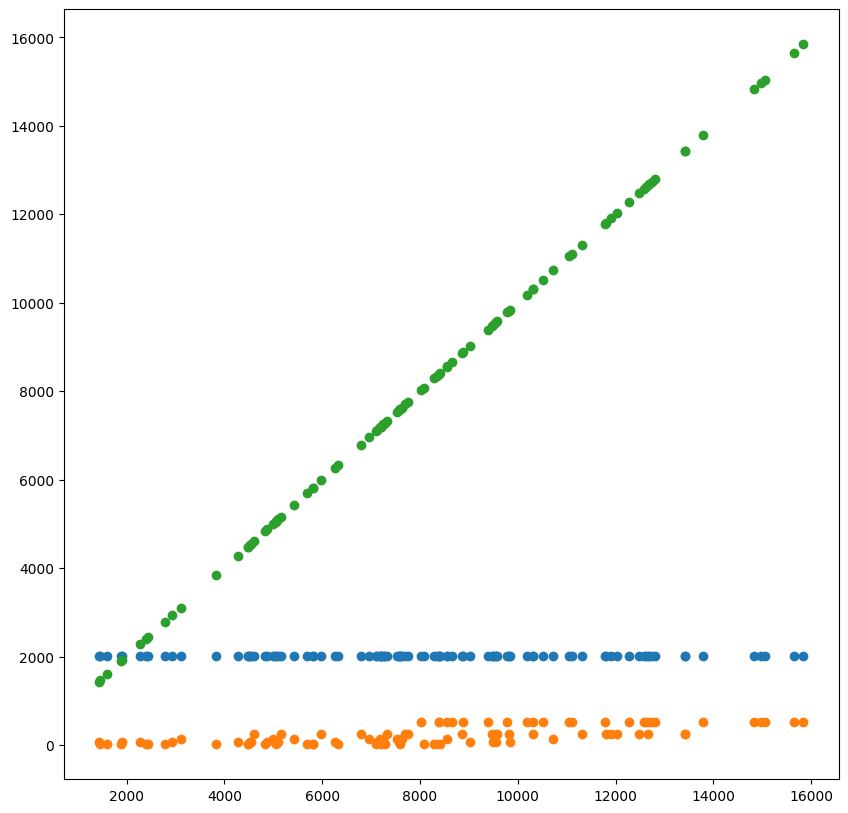

In [42]:
fig = plt.figure(figsize=(10,10))
params = ['year', 'disk', 'price']
for i in params:
  plt.scatter(df['price'], df[i])
plt.show()

Задание 1: обучить модель регрессии

In [54]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[['disk', 'year']]
y = df['price']

In [57]:
### Здесь следует запустить процесс обучения ###
reg = LinearRegression().fit(X,y)
### и продемонстрировать работоспобность обученной модели ###
print(reg.predict(X[22:23])[0], df.loc[22, 'price'])

10867.510122786975 10309


Задание 2: обучить модель классификации

In [61]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[['disk', 'year']]
y = df['os']

In [62]:
### Здесь следует запустить процесс обучения ###
cl = DecisionTreeClassifier().fit(X, y)
### и продемонстрировать работоспобность обученной модели ###
export_text(cl)

'|--- feature_0 <= 192.00\n|   |--- class: Android\n|--- feature_0 >  192.00\n|   |--- class: iOS\n'

In [64]:
print(cl.predict(X[48:49])[0], df.loc[48, 'os'])

iOS iOS


Задание 3: обучить модель кластеризации

In [65]:
df.tail()

,disk,os,price,year
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016
99,256,iOS,9533,2014


In [105]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[['disk', 'price']]

In [106]:
### Здесь следует запустить процесс обучения ###
clust = KMeans(n_clusters=3).fit(X)
### и продемонстрировать работоспобность обученной модели ###

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
c1, c2, c3 = clust.cluster_centers_

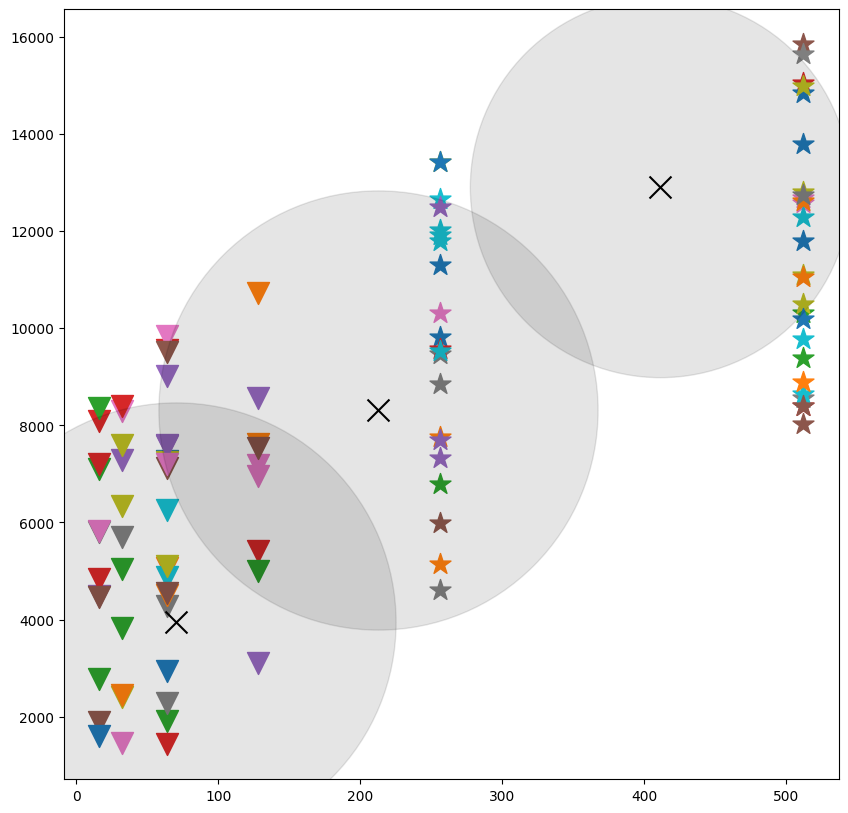

In [108]:
markers = {'iOS':'*', 'Android':'v'}
fig = plt.figure(figsize=(10,10))

for d, y, os in zip(df['disk'], df['price'], df['os']):
  plt.scatter(d, y, s=250, marker=markers[os])

plt.scatter(c1[0], c1[1], marker='x', c='black', s=250)
plt.scatter(c1[0], c1[1], s=250*3e2, c='black', alpha=0.1)

plt.scatter(c2[0], c2[1], marker='x', c='black', s=250)
plt.scatter(c2[0], c2[1], s=250*4e2, c='black', alpha=0.1)

plt.scatter(c3[0], c3[1], marker='x', c='black', s=250)
plt.scatter(c3[0], c3[1], s=250*4e2, c='black', alpha=0.1)

In [99]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[['disk', 'price', 'year']]

### Здесь следует запустить процесс обучения ###
clust = KMeans(n_clusters=2).fit(X)
### и продемонстрировать работоспобность обученной модели ###

c1, c2 = clust.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


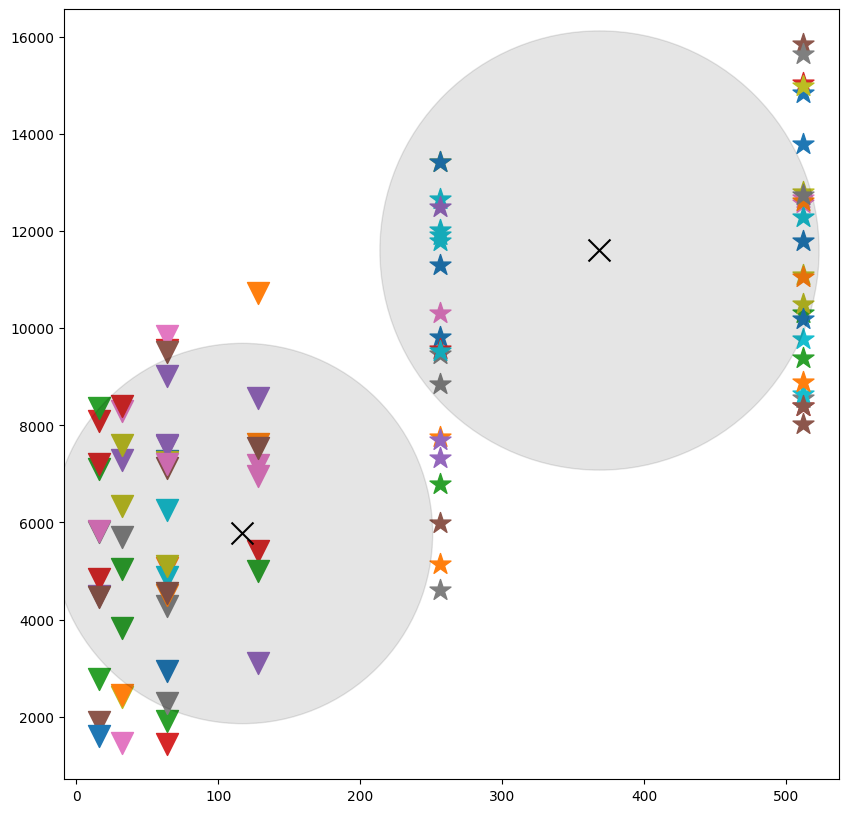

In [100]:
markers = {'iOS':'*', 'Android':'v'}
fig = plt.figure(figsize=(10,10))

for d, y, os in zip(df['disk'], df['price'], df['os']):
  plt.scatter(d, y, s=250, marker=markers[os])

plt.scatter(c1[0], c1[1], marker='x', c='black', s=250)
plt.scatter(c1[0], c1[1], s=250*3e2, c='black', alpha=0.1)

plt.scatter(c2[0], c2[1], marker='x', c='black', s=250)
plt.scatter(c2[0], c2[1], s=250*4e2, c='black', alpha=0.1)